In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
# from tensorflow_gan.python.losses.losses_impl import wasserstein_generator_loss, wasserstein_discriminator_loss

In [2]:
tf.enable_eager_execution()
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla K80, pci bus id: 0000:00:1e.0, compute capability: 3.7



In [3]:
df = pd.read_csv("data/metadata.csv")

In [4]:
df

card_file_name      id  \
0          data/pictures/Base Set/Alakazam_(Base_Set_1)   1/102   
1         data/pictures/Base Set/Blastoise_(Base_Set_2)   2/102   
2           data/pictures/Base Set/Chansey_(Base_Set_3)   3/102   
3         data/pictures/Base Set/Charizard_(Base_Set_4)   4/102   
4          data/pictures/Base Set/Clefairy_(Base_Set_5)   5/102   
5          data/pictures/Base Set/Gyarados_(Base_Set_6)   6/102   
6        data/pictures/Base Set/Hitmonchan_(Base_Set_7)   7/102   
7           data/pictures/Base Set/Machamp_(Base_Set_8)   8/102   
8          data/pictures/Base Set/Magneton_(Base_Set_9)   9/102   
9           data/pictures/Base Set/Mewtwo_(Base_Set_10)  10/102   
10        data/pictures/Base Set/Nidoking_(Base_Set_11)  11/102   
11       data/pictures/Base Set/Ninetales_(Base_Set_12)  12/102   
12       data/pictures/Base Set/Poliwrath_(Base_Set_13)  13/102   
13          data/pictures/Base Set/Raichu_(Base_Set_14)  14/102   
14        data/pictures/Base Set/Venusaur_(Base_Set_15)  15/102   
15          data/pictures/Base Set/Zapdos_(Base_Set_16)  16/102   
16        data/pictures/Base Set/Beedrill_(Base_Set_17)  17/102   
17       data/pictures/Base Set/Dragonair_(Base_Set_18)  18/102   
18         data/pictures/Base Set/Dugtrio_(Base_Set_19)  19/102   
19      data/pictures/Base Set/Electabuzz_(Base_Set_20)  20/102   
20       data/pictures/Base Set/Electrode_(Base_Set_21)  21/102   
21       data/pictures/Base Set/Pidgeotto_(Base_Set_22)  22/102   
22        data/pictures/Base Set/Arcanine_(Base_Set_23)  23/102   
23      data/pictures/Base Set/Charmeleon_(Base_Set_24)  24/102   
24         data/pictures/Base Set/Dewgong_(Base_Set_25)  25/102   
25         data/pictures/Base Set/Dratini_(Base_Set_26)  26/102   
26    data/pictures/Base Set/Farfetch%27d_(Base_Set_27)  27/102   
27       data/pictures/Base Set/Growlithe_(Base_Set_28)  28/102   
28         data/pictures/Base Set/Haunter_(Base_Set_29)  29/102   
29         data/pictures/Base Set/Ivysaur_(Base_Set_30)  30/102   
...                                                 ...     ...   
9912  data/pictures/McDonald's Collection 2018/Murkr...   27/40   
9913  data/pictures/McDonald's Collection 2018/Sneas...   28/40   
9914  data/pictures/McDonald's Collection 2018/Skarm...   29/40   
9915  data/pictures/McDonald's Collection 2018/Clefa...   30/40   
9916  data/pictures/McDonald's Collection 2018/Ralts...   31/40   
9917  data/pictures/McDonald's Collection 2018/Drati...   32/40   
9918  data/pictures/McDonald's Collection 2018/Goomy...   33/40   
9919  data/pictures/McDonald's Collection 2018/Jangm...   34/40   
9920  data/pictures/McDonald's Collection 2018/Meowt...   35/40   
9921  data/pictures/McDonald's Collection 2018/Chans...   36/40   
9922  data/pictures/McDonald's Collection 2018/Eevee...   37/40   
9923  data/pictures/McDonald's Collection 2018/Lilli...   38/40   
9924  data/pictures/McDonald's Collection 2018/Fletc...   39/40   
9925  data/pictures/McDonald's Collection 2018/Stuff...   40/40   
9926  data/pictures/Pokémon Rumble/Venusaur_(Pok%C3%...    1/16   
9927  data/pictures/Pokémon Rumble/Cherrim_(Pok%C3%A...    2/16   
9928  data/pictures/Pokémon Rumble/Ninetales_(Pok%C3...    3/16   
9929  data/pictures/Pokémon Rumble/Heatran_(Pok%C3%A...    4/16   
9930  data/pictures/Pokémon Rumble/Starmie_(Pok%C3%A...    5/16   
9931  data/pictures/Pokémon Rumble/Gyarados_(Pok%C3%...    6/16   
9932  data/pictures/Pokémon Rumble/Pikachu_(Pok%C3%A...    7/16   
9933  data/pictures/Pokémon Rumble/Zapdos_(Pok%C3%A9...    8/16   
9934  data/pictures/Pokémon Rumble/Mewtwo_(Pok%C3%A9...    9/16   
9935  data/pictures/Pokémon Rumble/Mew_(Pok%C3%A9mon...   10/16   
9936  data/pictures/Pokémon Rumble/Diglett_(Pok%C3%A...   11/16   
9937  data/pictures/Pokémon Rumble/Lucario_(Pok%C3%A...   12/16   
9938  data/pictures/Pokémon Rumble/Skuntank_(Pok%C3%...   13/16   
9939  data/pictures/Pokémon Rumble/Bastiodon_(Pok%C3...   14/16   
9940  data/pictures/P

# Drop a couple of bad records

In [5]:
df = df[~df["card_file_name"].isin([
    "data/pictures/Mysterious Treasures/Honchkrow_(Mysterious_Treasures_10)",
    "data/pictures/Unified Minds/Umbreon_%26_Darkrai-GX_(Unified_Minds_125)", # missing on website
    "data/pictures/Base Set/Charizard_(Base_Set_4)", # special version of normal website
    "data/pictures/Stormfront/Charizard_(Stormfront_103)", # special version of normal website
])]

import os
df = df[np.array([os.path.exists(f) for f in df["card_file_name"]])]

filter to Pokemon types

In [6]:
# df.type.value_counts()
filter_to_pokemon_types = True
filter_to_simple_rarities = False

if filter_to_pokemon_types:
    df = df[df["type"].isin([
        "Water",
        "Grass",
        "Colorless",
        "Psychic",
        "Fighting",
        "Fire",
        "Lightning",
        "Darkness",
        "Metal",
        "Dragon",
        "Fairy",
    ])]

if filter_to_simple_rarities:
    df = df[df["rarity"].isin([
        "Common",
        "Uncommon",
        "Rare",
        "Rare Holo",
        "Rare Holo ex",
    ])]


# Parameters

In [48]:
n_epochs = 200
n_random_inputs_per_training = 2000
n_real_per_training = 4000
batch_size = 100

n_generator_input = 200
n_generator_dense = 1000

use_greyscale = False
# rescale_dimensions = (32, 64)
rescale_dimensions = (128, 64)
# rescale_dimensions = None

columns_as_input = [
    "rarity",
    "type",
#     "setname"
]

assert n_real_per_training % batch_size == 0

# Create dataset

In [49]:
# Function to load and preprocess each image
def parse_image_file(
    filename,
    label = None,
    crop=False,
    to_greyscale=False,
    rescale=None,
):
    img = tf.io.read_file(filename)
    img = tf.cast(tf.image.decode_jpeg(img, channels=3), tf.float32) / 255.0
    
#     if img.shape[0] < 50:
#         print(f"Error with image `{filename}`: shape found was small: {img.shape}")
    img = tf.image.resize_with_crop_or_pad(img, 260, 180)
    
    # Some images have an extra alpha channel. Remove that.
    img = img[:, :, :3]
    
    if crop:
        img = tf.image.crop_to_bounding_box(
            img, 
            offset_height = 35,
            offset_width = 20,
            target_height = 100,
            target_width = 140,
        )
        
    if rescale is not None:
        img = tf.image.resize(img, size=rescale)
        
    if to_greyscale:
        img = tf.image.rgb_to_grayscale(img)
        img = tf.expand_dims(img, -1)
    
    if label is None: return img
    else: return img, label

In [50]:
n_records = df.shape[0]

In [51]:
images = tf.constant(df["card_file_name"].values)
x = tf.stack([parse_image_file(img, crop=False, to_greyscale=use_greyscale, rescale=rescale_dimensions) for img in images], axis=0)
gc.collect()

KeyboardInterrupt: 

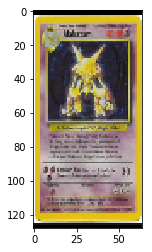

In [52]:
example_input = x[0]
generator_dense_output_size = int(tf.reduce_prod(example_input.shape))
generator_output_size = example_input.shape

plt.imshow(tf.squeeze(x[0]), cmap='gray')

### Make the class dataset

In [53]:
def label_converter(label):
    return tf.math.argmax(label, axis=-1)

def make_conversion_function(classes):
    return lambda idx: convert_column(idx, classes)

def convert_column(idx, classes):
    return tf.gather(classes, idx)
    
def target_columns_to_tf(column_names):
    y = {}
    size_per_class = []
    conversion_functions = {}
    
    for colname in column_names:
        col = df[colname]
        classnames, indices = np.unique(col.values, return_inverse=True)
        classnames = np.append(classnames, "Fake")
        n_classes = len(classnames)
        size_per_class.append(n_classes)
        
        conversion_functions[colname] = make_conversion_function(classnames)
        y[colname] = keras.utils.to_categorical(indices, n_classes)

    return (
        y,
        size_per_class,
        conversion_functions,
    )

In [54]:
y, size_per_class, conversion_functions = target_columns_to_tf(columns_as_input)

def convert_target_matrix_to_label(pred, colname):
    current_start_index = 0
    pred = pred[colname]
    
    label_indices = label_converter(pred)
    return conversion_functions[colname](label_indices)


In [55]:
convert_target_matrix_to_label(y, "type")

<tf.Tensor: id=311065, shape=(8591,), dtype=string, numpy=
array([b'Psychic', b'Water', b'Colorless', ..., b'Metal', b'Colorless',
       b'Colorless'], dtype=object)>

# Generator

In [56]:
def make_generator_input(n_records, given_labels: dict = None):
    base_random_input = tf.random.normal((n_records, n_generator_input))
    
    labels = [
        keras.utils.to_categorical(
            tf.convert_to_tensor(
                np.random.randint(size=(n_records, 1), low=0, high=size-1) # -1 to avoid making fake classes
            )
        , size)
        for size in size_per_class
    ]
    
    x_extra = tf.concat(labels, axis=-1)
    
    x = tf.concat([base_random_input, x_extra], axis=-1)
    y = {colname: label for colname, label in zip(columns_as_input, labels)}
    return x, y

assert make_generator_input(10)[0].shape[1] == n_generator_input + sum(size_per_class)

In [57]:
generator_conv_sizes = [8, 4, 6, 3, 1, 1]
generator_init_height = generator_output_size[0].value
generator_init_width = generator_output_size[1].value
generator_init_channels = 20
generator_filters = 50
generator_upsampling = [1, 1, 2, 2, 1, 1]
generator_use_batchnorm = True

for sampling, conv_size in zip(reversed(generator_upsampling), reversed(generator_conv_sizes)):
    print(f"{conv_size} --- \twidth: {generator_init_width}\t height: {generator_init_height}")
    generator_init_width = (generator_init_width - (conv_size - 1)) / sampling
    generator_init_height = (generator_init_height - (conv_size - 1)) / sampling
    
print(f"{conv_size} --- \twidth: {generator_init_width}\t height: {generator_init_height}")
assert int(generator_init_width) == generator_init_width and int(generator_init_height) == generator_init_height
generator_init_width = int(generator_init_width)
generator_init_height = int(generator_init_height)

generator_last_dense_layer = generator_init_height * generator_init_channels * generator_init_width

1 --- 	width: 64	 height: 128
1 --- 	width: 64.0	 height: 128.0
3 --- 	width: 64.0	 height: 128.0
6 --- 	width: 31.0	 height: 63.0
4 --- 	width: 13.0	 height: 29.0
8 --- 	width: 10.0	 height: 26.0
8 --- 	width: 3.0	 height: 19.0


In [58]:
generator_input = keras.layers.Input((n_generator_input + sum(size_per_class),))
gen_x = keras.layers.Dropout(.5)(generator_input)

for i in range(2):
    gen_x = keras.layers.Dense(n_generator_dense)(gen_x)
    gen_x = keras.layers.LeakyReLU()(gen_x)
    
    if generator_use_batchnorm:
        gen_x = keras.layers.BatchNormalization()(gen_x)

gen_x = keras.layers.Dense(generator_last_dense_layer)(gen_x)
gen_x = keras.layers.LeakyReLU()(gen_x)
if generator_use_batchnorm:
    gen_x = keras.layers.BatchNormalization()(gen_x)

gen_x = keras.layers.Reshape((generator_init_height, generator_init_width, generator_init_channels))(gen_x)


for i, (conv_size, upsampling) in enumerate(zip(generator_conv_sizes, generator_upsampling)):
    if i < len(generator_conv_sizes) - 1:
        act = "relu"
        filters=generator_filters
    else:
        act = "sigmoid"
        filters= 1 if use_greyscale else 3
    
    if upsampling > 1:
        gen_x = keras.layers.UpSampling2D(size=upsampling)(gen_x)
    gen_x = keras.layers.Conv2DTranspose(
        filters=filters, 
        kernel_size=conv_size,
        activation=act,
    )(gen_x)
    
generator = keras.Model(generator_input, gen_x)

In [59]:
generator.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 229)]             0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 229)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1000)              230000    
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 1000)              0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 1000)              4000      
_________________________________________________________________
dense_12 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 1000)              0   

In [60]:
assert generator.predict(make_generator_input(1)[0]).shape == tf.expand_dims(example_input, 0).shape

# Minibatch Discrimination

In [20]:

class MinibatchDiscrimination(keras.layers.Layer):
    """Concatenates to each sample information about how different the input
    features for that sample are from features of other samples in the same
    minibatch, as described in Salimans et. al. (2016). Useful for preventing
    GANs from collapsing to a single output. When using this layer, generated
    samples and reference samples should be in separate batches.
    # Example
    ```python
        # apply a convolution 1d of length 3 to a sequence with 10 timesteps,
        # with 64 output filters
        model = Sequential()
        model.add(Convolution1D(64, 3, border_mode='same', input_shape=(10, 32)))
        # now model.output_shape == (None, 10, 64)
        # flatten the output so it can be fed into a minibatch discrimination layer
        model.add(Flatten())
        # now model.output_shape == (None, 640)
        # add the minibatch discrimination layer
        model.add(MinibatchDiscrimination(5, 3))
        # now model.output_shape = (None, 645)
    ```
    # Arguments
        nb_kernels: Number of discrimination kernels to use
            (dimensionality concatenated to output).
        kernel_dim: The dimensionality of the space where closeness of samples
            is calculated.
        init: name of initialization function for the weights of the layer
            (see [initializations](../initializations.md)),
            or alternatively, Theano function to use for weights initialization.
            This parameter is only relevant if you don't pass a `weights` argument.
        weights: list of numpy arrays to set as initial weights.
        W_regularizer: instance of [WeightRegularizer](../regularizers.md)
            (eg. L1 or L2 regularization), applied to the main weights matrix.
        activity_regularizer: instance of [ActivityRegularizer](../regularizers.md),
            applied to the network output.
        W_constraint: instance of the [constraints](../constraints.md) module
            (eg. maxnorm, nonneg), applied to the main weights matrix.
        input_dim: Number of channels/dimensions in the input.
            Either this argument or the keyword argument `input_shape`must be
            provided when using this layer as the first layer in a model.
    # Input shape
        2D tensor with shape: `(samples, input_dim)`.
    # Output shape
        2D tensor with shape: `(samples, input_dim + nb_kernels)`.
    # References
        - [Improved Techniques for Training GANs](https://arxiv.org/abs/1606.03498)
    """

    def __init__(self, nb_kernels, kernel_dim, init='glorot_uniform', weights=None,
                 W_regularizer=None, activity_regularizer=None,
                 W_constraint=None, input_dim=None, **kwargs):
        self.init = keras.initializers.get(init)
        self.nb_kernels = nb_kernels
        self.kernel_dim = kernel_dim
        self.input_dim = input_dim

        self.W_regularizer = keras.regularizers.get(W_regularizer)
        self.activity_regularizer = keras.regularizers.get(activity_regularizer)

        self.W_constraint = keras.constraints.get(W_constraint)

        self.initial_weights = weights
        self.input_spec = [keras.layers.InputSpec(ndim=2)]

        if self.input_dim:
            kwargs['input_shape'] = (self.input_dim,)
        super(MinibatchDiscrimination, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 2
        input_dim = input_shape[1]
#         self.input_spec = [keras.layers.InputSpec(dtype=keras.backend.floatx,
#                                      shape=(None, input_dim))]
        self.W = self.init(
            (self.nb_kernels, input_dim, self.kernel_dim),
#             name='{}_W'.format(self.name)
        )

#         self.trainable_weights = [self.W]

        self.regularizers = []
        if self.W_regularizer:
            self.W_regularizer.set_param(self.W)
            self.regularizers.append(self.W_regularizer)

        if self.activity_regularizer:
            self.activity_regularizer.set_layer(self)
            self.regularizers.append(self.activity_regularizer)

        self.constraints = {}
        if self.W_constraint:
            self.constraints[self.W] = self.W_constraint

        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights

    def call(self, x, mask=None):
        activation = keras.backend.reshape(keras.backend.dot(x, self.W), (-1, self.nb_kernels, self.kernel_dim))
        diffs = keras.backend.expand_dims(activation, 3) - keras.backend.expand_dims(keras.backend.permute_dimensions(activation, [1, 2, 0]), 0)
        abs_diffs = keras.backend.sum(keras.backend.abs(diffs), axis=2)
        minibatch_features = keras.backend.sum(keras.backend.exp(-abs_diffs), axis=2)
        return keras.backend.concatenate([x, minibatch_features], 1)

    def get_output_shape_for(self, input_shape):
        assert input_shape and len(input_shape) == 2
        return input_shape[0], input_shape[1]+self.nb_kernels

    def get_config(self):
        config = {'nb_kernels': self.nb_kernels,
                  'kernel_dim': self.kernel_dim,
                  'init': self.init.__name__,
                  'W_regularizer': self.W_regularizer.get_config() if self.W_regularizer else None,
                  'activity_regularizer': self.activity_regularizer.get_config() if self.activity_regularizer else None,
                  'W_constraint': self.W_constraint.get_config() if self.W_constraint else None,
                  'input_dim': self.input_dim}
        base_config = super(MinibatchDiscrimination, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [21]:
def test_minibatch():
    n = 12
    nvar = 4
    B = 6
    C = 7
    A = tf.random.normal((n, nvar))
    l = MinibatchDiscrimination(B, C)
    l.build(A.shape)
    assert l.call(A).shape == (n, nvar + B)
    
test_minibatch()

# Discriminator

In [22]:
discr_dense_size = 256
discr_filters = 40
discr_minibatch_features = int(discr_dense_size / 10)
disc_C = 20

inputs = keras.layers.Input(shape=generator_output_size)
x_1 = keras.layers.Dropout(.5)(inputs)
x_1 = keras.layers.Conv2D(filters=discr_filters, kernel_size=5, strides=2, input_shape=generator_output_size)(x_1)
x_1 = keras.layers.MaxPool2D()(x_1)
x_1 = keras.layers.Dropout(.3)(x_1)
x_1 = keras.layers.Conv2D(filters=discr_filters, kernel_size=5, strides=2)(x_1)
x_1 = keras.layers.MaxPool2D()(x_1)
x_1 = keras.layers.Flatten()(x_1)
x_1 = keras.layers.Dropout(.3)(x_1)

x_1 = keras.layers.Dense(units=discr_dense_size)(x_1)
x_1 = keras.layers.LeakyReLU()(x_1)
x_1 = MinibatchDiscrimination(discr_minibatch_features, disc_C)(x_1)
x_1 = keras.layers.BatchNormalization()(x_1)
x_1 = keras.layers.Dropout(.3)(x_1)

x_1 = keras.layers.Dense(units=discr_dense_size)(x_1)
x_1 = keras.layers.LeakyReLU()(x_1)
x_1 = MinibatchDiscrimination(discr_minibatch_features, disc_C)(x_1)
x_1 = keras.layers.BatchNormalization()(x_1)
x_1 = keras.layers.Dropout(.3)(x_1)
    
outputs = {
    colname: keras.layers.Dense(units=size, activation="softmax", name=colname)(x_1) 
    for colname, size in zip(columns_as_input, size_per_class)
}

discriminator = keras.Model(inputs, outputs, name="discriminator")

discriminator.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=.001),
    loss=keras.losses.categorical_crossentropy,
    metrics=[keras.metrics.CategoricalAccuracy()],
)
discriminator.trainable = False

In [23]:
discriminator.summary()

Model: "discriminator"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 64, 3)] 0                                            
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 128, 64, 3)   0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 62, 30, 40)   3040        dropout_1[0][0]                  
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 31, 15, 40)   0           conv2d[0][0]                     
______________________________________________________________________________________

# Generator training model

In [64]:
generator_trainer = keras.Model(
    generator_input,
    discriminator(generator(generator_input)), 
)

generator_trainer.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 229)]             0         
_________________________________________________________________
model_4 (Model)              (None, 128, 64, 3)        2604103   
_________________________________________________________________
discriminator (Model)        {'rarity': (None, 17), 't 340994    
Total params: 2,945,097
Trainable params: 2,597,823
Non-trainable params: 347,274
_________________________________________________________________


In [65]:
generator_trainer.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=.0003),
#     loss=generator_loss,
    loss=keras.losses.categorical_crossentropy,
    metrics=[keras.metrics.CategoricalAccuracy()],
)

In [66]:
random_input = make_generator_input(1)[0]
test_predict = generator_trainer.predict(random_input)

for output, expected_size in zip(test_predict, size_per_class):
    assert output.shape[1] == expected_size, f"{output.shape} vs {expected_size}"

# Training

In [27]:
# Intionally swapped tradidtion fake/real labels
def make_fake_label(n_records):
    return {
        colname: keras.utils.to_categorical(tf.ones((n_records, 1)) * (size - 1), size)
        for colname, size in zip(columns_as_input, size_per_class)
    }

def make_real_label(n_records):
    return make_label(n_records, 0.9, 1)

def make_label(n_records, min_, max_):
    return tf.random.uniform(shape=(n_records, 1), minval=min_, maxval=max_)

def concat_y(y_1, y_2):
    return {k: tf.concat((v, y_2[k]), axis=0) for k, v in y_1.items()}

def squeeze_y(Y, idx):
    return {k: tf.squeeze(tf.gather(v, idx)) for k, v in Y.items()}

# Pretrain discriminator

In [28]:
def train_discriminator(
    epochs,
    n_real=n_real_per_training,
    n_fake=n_random_inputs_per_training,
    
):
    with_real = n_real > 0
    with_fake = n_fake > 0 
    
    if with_fake:
        generator_x, generator_y = make_generator_input(n_fake)
        generated_input = generator.predict(generator_x)
        generator_y_fake = make_fake_label(n_fake)

    if with_real:
        if n_real == x.shape[0]:
            real_x = x
            real_y = y
        else:
            real_indices = np.random.randint(size=(n_real, 1), low=0, high=n_records)
            real_x = tf.squeeze(tf.gather(x, real_indices))
            real_y = squeeze_y(y, real_indices)
    
    if with_real and with_fake:
        discriminator_x = tf.concat((real_x, generated_input), axis=0)
        discriminator_y = concat_y(real_y, generator_y_fake)
    elif with_real:
        discriminator_x = real_x
        discriminator_y = real_y
    elif with_fake:
        discriminator_x = generated_input
        discriminator_y = generator_y_fake
        
    discriminator.fit(discriminator_x, discriminator_y, epochs=epochs, shuffle=False, batch_size=batch_size)

In [29]:
try:
    train_discriminator(epochs=10, n_real=x.shape[0], n_fake=0)
finally:
    gc.collect()

Train on 8591 samples
Epoch 1/10
8591/8591 [==============================] - 5s 631us/sample - loss: 4.7787 - rarity_loss: 3.1194 - type_loss: 1.6593 - rarity_categorical_accuracy: 0.1589 - type_categorical_accuracy: 0.4925
Epoch 2/10
8591/8591 [==============================] - 3s 300us/sample - loss: 3.1758 - rarity_loss: 2.3670 - type_loss: 0.8105 - rarity_categorical_accuracy: 0.2541 - type_categorical_accuracy: 0.7489
Epoch 3/10
8591/8591 [==============================] - 3s 302us/sample - loss: 2.7343 - rarity_loss: 2.0221 - type_loss: 0.7145 - rarity_categorical_accuracy: 0.2897 - type_categorical_accuracy: 0.7826
Epoch 4/10
8591/8591 [==============================] - 3s 297us/sample - loss: 2.4994 - rarity_loss: 1.8558 - type_loss: 0.6464 - rarity_categorical_accuracy: 0.3217 - type_categorical_accuracy: 0.8024
Epoch 5/10
8591/8591 [==============================] - 3s 298us/sample - loss: 2.3680 - rarity_loss: 1.7655 - type_loss: 0.6054 - rarity_categorical_accuracy: 0.3193

# Train generator

In [30]:
def plot_images_and_classes(n):
    inputs, y = make_generator_input(n)
    predictions = generator.predict(inputs)
    labels = {k: convert_target_matrix_to_label(y, k) for k in y}
    
    for i in range(n):
        img = predictions[i]        
        plt.imshow(img)
        title = {k: v.numpy()[i] for k, v in labels.items()}
        plt.title(f"{title}")
        plt.show()


In [31]:
def train_generator(
    epochs: int,
    n_fake = n_random_inputs_per_training,
):
    generator_x, generator_y = make_generator_input(n_fake)
    
    # stupid renaming because of keras bullshit.
    make_name = lambda i: "discriminator" if i==0 else f"discriminator_{i}"
    generator_y_gen = {make_name(i): generator_y[col] for i, col in enumerate(columns_as_input)}
    
    generator_trainer.fit(generator_x, generator_y_gen, epochs=epochs, batch_size=batch_size)

0 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 277us/sample - loss: 1.9822 - rarity_loss: 1.4728 - type_loss: 0.5094 - rarity_categorical_accuracy: 0.4400 - type_categorical_accuracy: 0.8343
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 9.7610 - discriminator_loss: 5.2238 - discriminator_1_loss: 4.5373 - discriminator_categorical_accuracy: 0.0240 - discriminator_1_categorical_accuracy: 0.0945


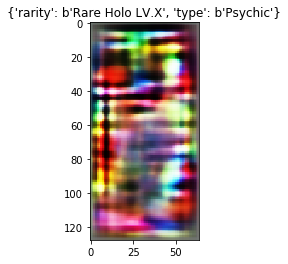

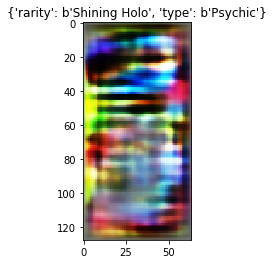

1 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 276us/sample - loss: 2.0076 - rarity_loss: 1.4673 - type_loss: 0.5403 - rarity_categorical_accuracy: 0.4447 - type_categorical_accuracy: 0.8298
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 9.3954 - discriminator_loss: 5.3406 - discriminator_1_loss: 4.0548 - discriminator_categorical_accuracy: 0.0385 - discriminator_1_categorical_accuracy: 0.1665


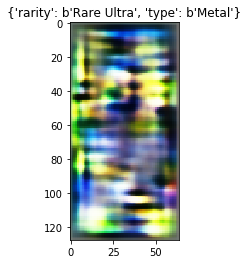

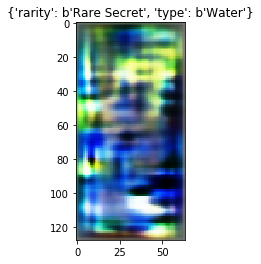

2 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 279us/sample - loss: 1.9456 - rarity_loss: 1.4649 - type_loss: 0.4807 - rarity_categorical_accuracy: 0.4410 - type_categorical_accuracy: 0.8403
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.0743 - discriminator_loss: 5.4733 - discriminator_1_loss: 4.6009 - discriminator_categorical_accuracy: 0.0180 - discriminator_1_categorical_accuracy: 0.0795


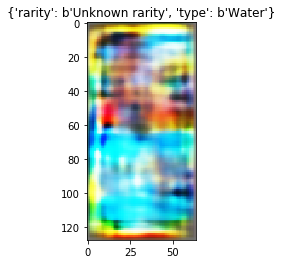

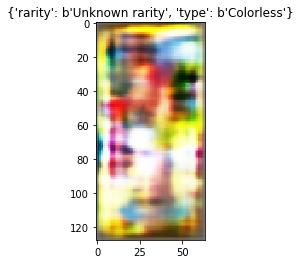

3 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 277us/sample - loss: 1.9703 - rarity_loss: 1.4694 - type_loss: 0.5009 - rarity_categorical_accuracy: 0.4372 - type_categorical_accuracy: 0.8360
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 9.7287 - discriminator_loss: 5.3855 - discriminator_1_loss: 4.3433 - discriminator_categorical_accuracy: 0.0250 - discriminator_1_categorical_accuracy: 0.1150


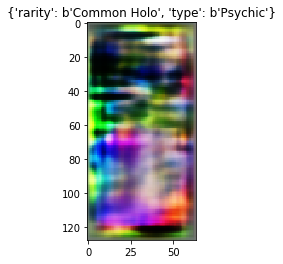

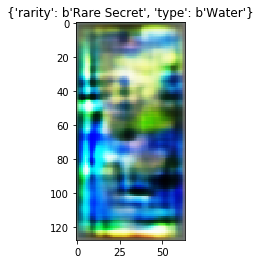

4 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 278us/sample - loss: 1.8912 - rarity_loss: 1.4505 - type_loss: 0.4408 - rarity_categorical_accuracy: 0.4408 - type_categorical_accuracy: 0.8582
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 9.9854 - discriminator_loss: 5.4202 - discriminator_1_loss: 4.5651 - discriminator_categorical_accuracy: 0.0225 - discriminator_1_categorical_accuracy: 0.1020


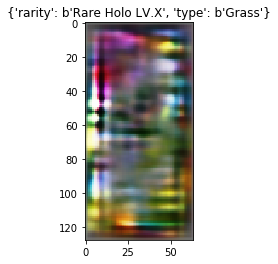

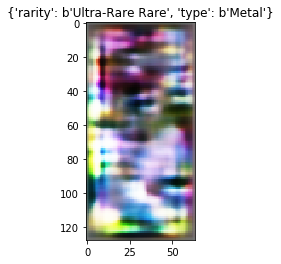

5 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 278us/sample - loss: 1.9500 - rarity_loss: 1.4695 - type_loss: 0.4805 - rarity_categorical_accuracy: 0.4442 - type_categorical_accuracy: 0.8468
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 9.7826 - discriminator_loss: 5.2467 - discriminator_1_loss: 4.5359 - discriminator_categorical_accuracy: 0.0395 - discriminator_1_categorical_accuracy: 0.1165


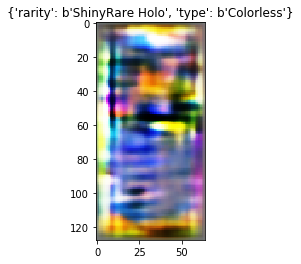

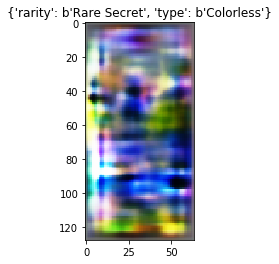

6 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 278us/sample - loss: 1.8920 - rarity_loss: 1.4282 - type_loss: 0.4638 - rarity_categorical_accuracy: 0.4457 - type_categorical_accuracy: 0.8577
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.1083 - discriminator_loss: 5.5315 - discriminator_1_loss: 4.5768 - discriminator_categorical_accuracy: 0.0230 - discriminator_1_categorical_accuracy: 0.0870


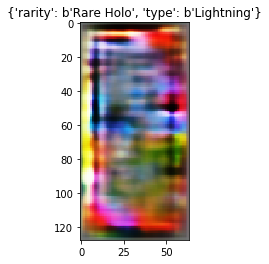

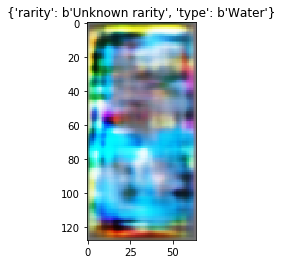

7 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 275us/sample - loss: 1.9644 - rarity_loss: 1.4555 - type_loss: 0.5089 - rarity_categorical_accuracy: 0.4458 - type_categorical_accuracy: 0.8433
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 9.8906 - discriminator_loss: 5.4948 - discriminator_1_loss: 4.3957 - discriminator_categorical_accuracy: 0.0230 - discriminator_1_categorical_accuracy: 0.1095


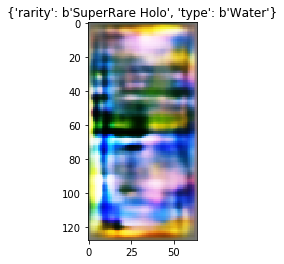

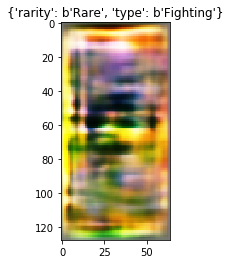

8 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 278us/sample - loss: 1.9132 - rarity_loss: 1.4395 - type_loss: 0.4737 - rarity_categorical_accuracy: 0.4413 - type_categorical_accuracy: 0.8482
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.4117 - discriminator_loss: 5.4736 - discriminator_1_loss: 4.9381 - discriminator_categorical_accuracy: 0.0240 - discriminator_1_categorical_accuracy: 0.0555


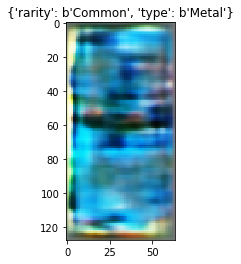

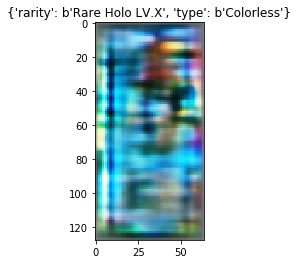

9 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 276us/sample - loss: 1.9619 - rarity_loss: 1.4509 - type_loss: 0.5110 - rarity_categorical_accuracy: 0.4355 - type_categorical_accuracy: 0.8390
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 9.8435 - discriminator_loss: 5.4480 - discriminator_1_loss: 4.3956 - discriminator_categorical_accuracy: 0.0300 - discriminator_1_categorical_accuracy: 0.1225


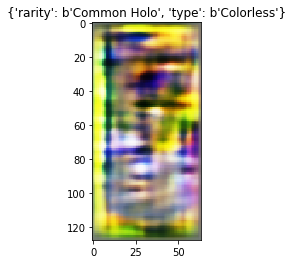

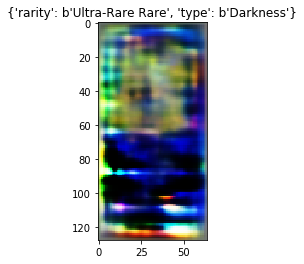

10 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 278us/sample - loss: 1.9045 - rarity_loss: 1.4265 - type_loss: 0.4780 - rarity_categorical_accuracy: 0.4537 - type_categorical_accuracy: 0.8473
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.1798 - discriminator_loss: 5.5604 - discriminator_1_loss: 4.6193 - discriminator_categorical_accuracy: 0.0160 - discriminator_1_categorical_accuracy: 0.0705


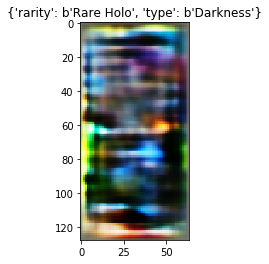

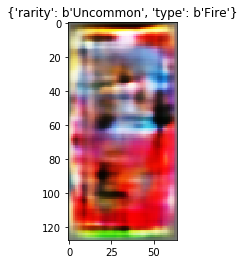

11 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 278us/sample - loss: 1.9006 - rarity_loss: 1.4335 - type_loss: 0.4671 - rarity_categorical_accuracy: 0.4612 - type_categorical_accuracy: 0.8508
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.0053 - discriminator_loss: 5.5338 - discriminator_1_loss: 4.4715 - discriminator_categorical_accuracy: 0.0285 - discriminator_1_categorical_accuracy: 0.1120


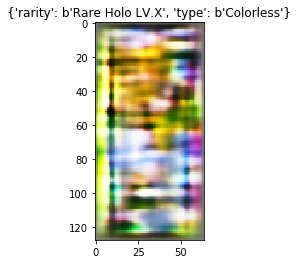

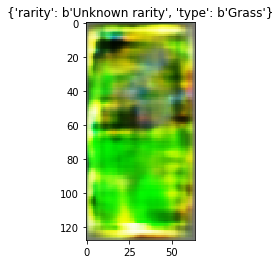

12 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 277us/sample - loss: 1.8802 - rarity_loss: 1.4253 - type_loss: 0.4550 - rarity_categorical_accuracy: 0.4532 - type_categorical_accuracy: 0.8507
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.5492 - discriminator_loss: 5.6956 - discriminator_1_loss: 4.8536 - discriminator_categorical_accuracy: 0.0180 - discriminator_1_categorical_accuracy: 0.0430


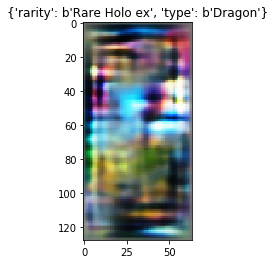

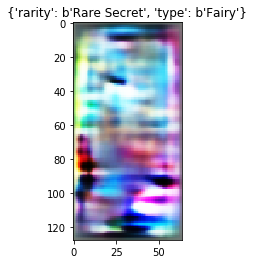

13 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 278us/sample - loss: 1.9142 - rarity_loss: 1.4383 - type_loss: 0.4759 - rarity_categorical_accuracy: 0.4567 - type_categorical_accuracy: 0.8497
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.0363 - discriminator_loss: 5.5243 - discriminator_1_loss: 4.5120 - discriminator_categorical_accuracy: 0.0280 - discriminator_1_categorical_accuracy: 0.0905


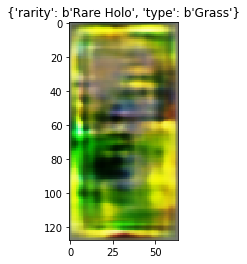

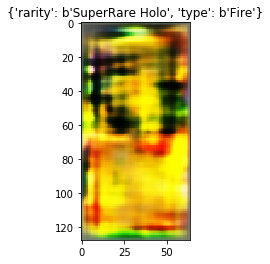

14 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 277us/sample - loss: 1.8321 - rarity_loss: 1.4122 - type_loss: 0.4199 - rarity_categorical_accuracy: 0.4602 - type_categorical_accuracy: 0.8645
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.0772 - discriminator_loss: 5.5302 - discriminator_1_loss: 4.5470 - discriminator_categorical_accuracy: 0.0350 - discriminator_1_categorical_accuracy: 0.1100


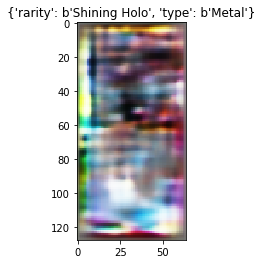

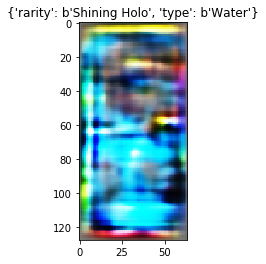

15 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 280us/sample - loss: 1.9052 - rarity_loss: 1.4176 - type_loss: 0.4876 - rarity_categorical_accuracy: 0.4618 - type_categorical_accuracy: 0.8480
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.2449 - discriminator_loss: 5.5797 - discriminator_1_loss: 4.6652 - discriminator_categorical_accuracy: 0.0205 - discriminator_1_categorical_accuracy: 0.0675


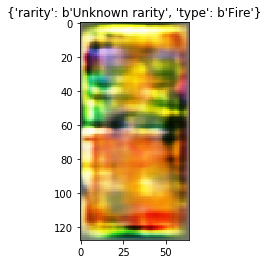

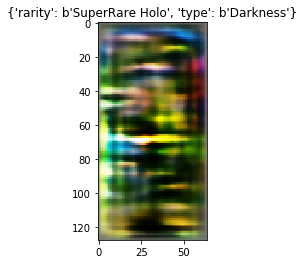

16 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 278us/sample - loss: 1.8376 - rarity_loss: 1.4100 - type_loss: 0.4276 - rarity_categorical_accuracy: 0.4607 - type_categorical_accuracy: 0.8595
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.6184 - discriminator_loss: 5.6884 - discriminator_1_loss: 4.9300 - discriminator_categorical_accuracy: 0.0255 - discriminator_1_categorical_accuracy: 0.0655


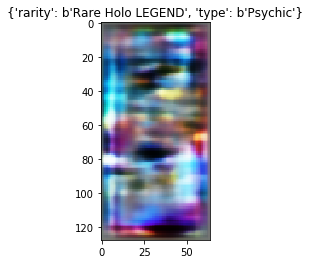

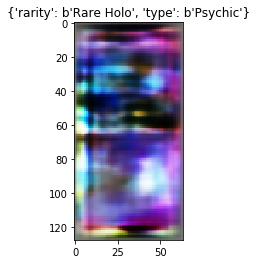

17 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 280us/sample - loss: 1.8426 - rarity_loss: 1.4080 - type_loss: 0.4346 - rarity_categorical_accuracy: 0.4705 - type_categorical_accuracy: 0.8632
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.3908 - discriminator_loss: 5.5837 - discriminator_1_loss: 4.8071 - discriminator_categorical_accuracy: 0.0230 - discriminator_1_categorical_accuracy: 0.0655


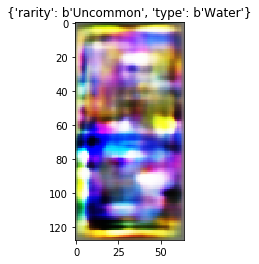

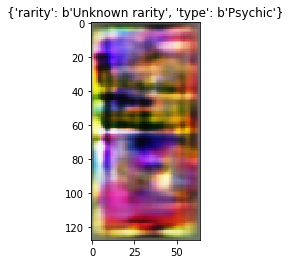

18 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 279us/sample - loss: 1.8285 - rarity_loss: 1.3829 - type_loss: 0.4457 - rarity_categorical_accuracy: 0.4872 - type_categorical_accuracy: 0.8600
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.7523 - discriminator_loss: 5.6727 - discriminator_1_loss: 5.0796 - discriminator_categorical_accuracy: 0.0305 - discriminator_1_categorical_accuracy: 0.0605


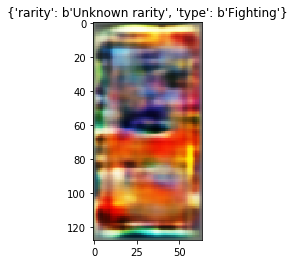

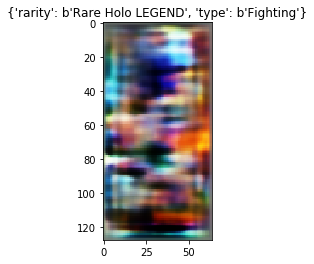

19 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 280us/sample - loss: 1.8731 - rarity_loss: 1.4236 - type_loss: 0.4494 - rarity_categorical_accuracy: 0.4572 - type_categorical_accuracy: 0.8580
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.1848 - discriminator_loss: 5.7715 - discriminator_1_loss: 4.4132 - discriminator_categorical_accuracy: 0.0240 - discriminator_1_categorical_accuracy: 0.1200


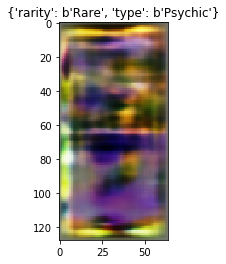

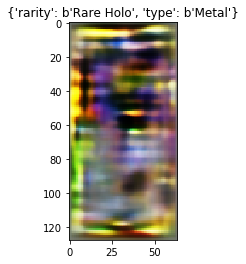

20 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 279us/sample - loss: 1.8382 - rarity_loss: 1.4121 - type_loss: 0.4262 - rarity_categorical_accuracy: 0.4637 - type_categorical_accuracy: 0.8648
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.8609 - discriminator_loss: 5.6479 - discriminator_1_loss: 5.2130 - discriminator_categorical_accuracy: 0.0140 - discriminator_1_categorical_accuracy: 0.0445


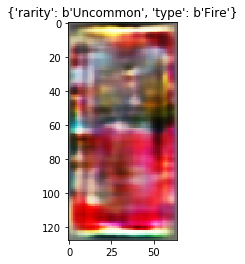

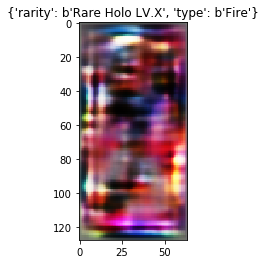

21 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 278us/sample - loss: 1.9037 - rarity_loss: 1.4085 - type_loss: 0.4952 - rarity_categorical_accuracy: 0.4683 - type_categorical_accuracy: 0.8472
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.0768 - discriminator_loss: 5.6555 - discriminator_1_loss: 4.4213 - discriminator_categorical_accuracy: 0.0365 - discriminator_1_categorical_accuracy: 0.1145


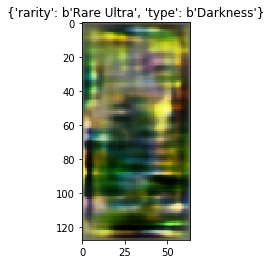

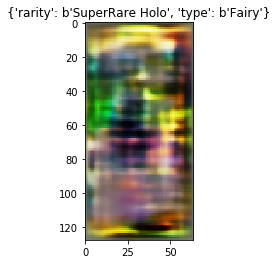

22 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 277us/sample - loss: 1.7863 - rarity_loss: 1.3848 - type_loss: 0.4015 - rarity_categorical_accuracy: 0.4693 - type_categorical_accuracy: 0.8702
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.9239 - discriminator_loss: 5.8371 - discriminator_1_loss: 5.0869 - discriminator_categorical_accuracy: 0.0225 - discriminator_1_categorical_accuracy: 0.0215


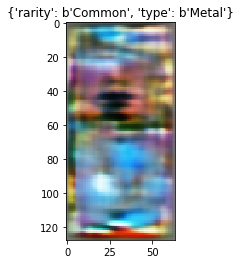

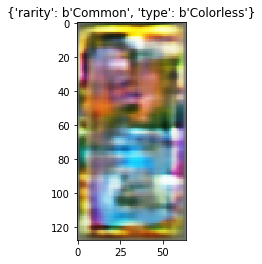

23 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 280us/sample - loss: 1.9188 - rarity_loss: 1.4054 - type_loss: 0.5133 - rarity_categorical_accuracy: 0.4638 - type_categorical_accuracy: 0.8420
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.6980 - discriminator_loss: 5.7296 - discriminator_1_loss: 4.9684 - discriminator_categorical_accuracy: 0.0230 - discriminator_1_categorical_accuracy: 0.0600


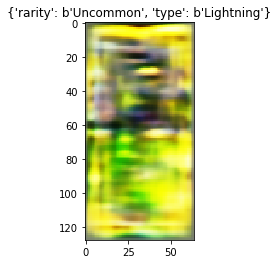

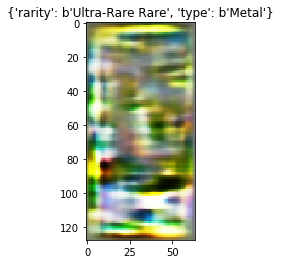

24 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 279us/sample - loss: 1.8546 - rarity_loss: 1.3858 - type_loss: 0.4688 - rarity_categorical_accuracy: 0.4778 - type_categorical_accuracy: 0.8543
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.4623 - discriminator_loss: 5.6205 - discriminator_1_loss: 4.8419 - discriminator_categorical_accuracy: 0.0245 - discriminator_1_categorical_accuracy: 0.0855


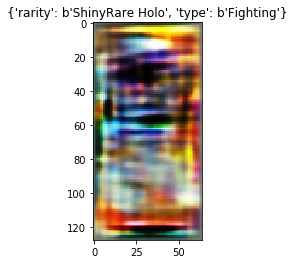

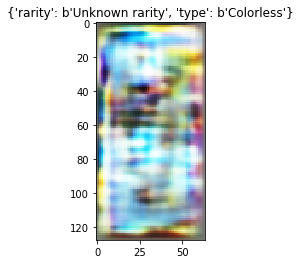

25 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 281us/sample - loss: 1.8108 - rarity_loss: 1.3868 - type_loss: 0.4240 - rarity_categorical_accuracy: 0.4735 - type_categorical_accuracy: 0.8657
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.5931 - discriminator_loss: 5.7947 - discriminator_1_loss: 4.7984 - discriminator_categorical_accuracy: 0.0305 - discriminator_1_categorical_accuracy: 0.0790


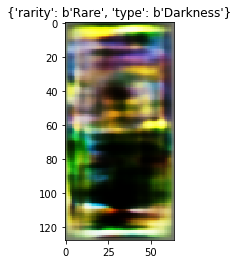

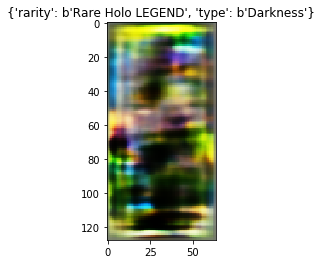

26 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 279us/sample - loss: 1.8110 - rarity_loss: 1.3742 - type_loss: 0.4368 - rarity_categorical_accuracy: 0.4777 - type_categorical_accuracy: 0.8668
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.8648 - discriminator_loss: 5.8350 - discriminator_1_loss: 5.0299 - discriminator_categorical_accuracy: 0.0170 - discriminator_1_categorical_accuracy: 0.0570


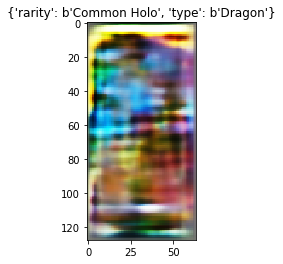

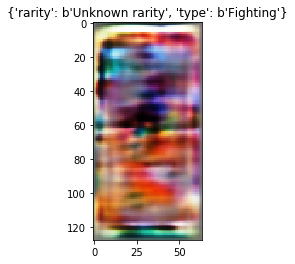

27 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 280us/sample - loss: 1.8214 - rarity_loss: 1.3846 - type_loss: 0.4368 - rarity_categorical_accuracy: 0.4738 - type_categorical_accuracy: 0.8595
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.1849 - discriminator_loss: 5.6702 - discriminator_1_loss: 4.5147 - discriminator_categorical_accuracy: 0.0290 - discriminator_1_categorical_accuracy: 0.0790


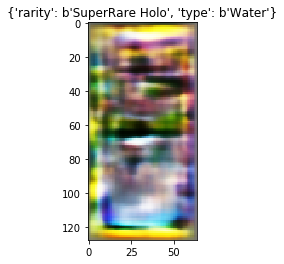

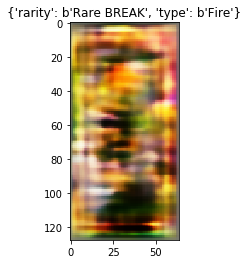

28 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 278us/sample - loss: 1.8364 - rarity_loss: 1.4123 - type_loss: 0.4241 - rarity_categorical_accuracy: 0.4660 - type_categorical_accuracy: 0.8670
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 11.0815 - discriminator_loss: 5.8132 - discriminator_1_loss: 5.2683 - discriminator_categorical_accuracy: 0.0170 - discriminator_1_categorical_accuracy: 0.0390


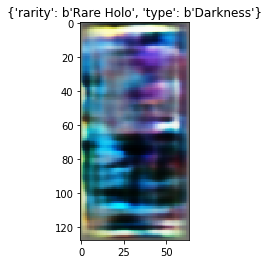

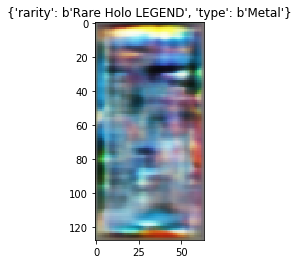

29 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 280us/sample - loss: 1.8619 - rarity_loss: 1.4152 - type_loss: 0.4467 - rarity_categorical_accuracy: 0.4570 - type_categorical_accuracy: 0.8600
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.4342 - discriminator_loss: 5.8701 - discriminator_1_loss: 4.5641 - discriminator_categorical_accuracy: 0.0240 - discriminator_1_categorical_accuracy: 0.1045


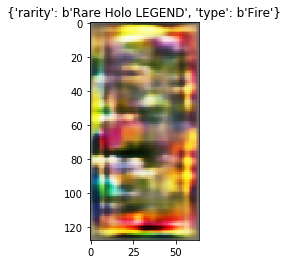

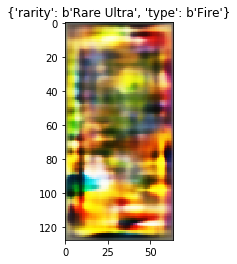

30 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 279us/sample - loss: 1.8028 - rarity_loss: 1.3687 - type_loss: 0.4341 - rarity_categorical_accuracy: 0.4797 - type_categorical_accuracy: 0.8615
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 11.2395 - discriminator_loss: 5.8089 - discriminator_1_loss: 5.4306 - discriminator_categorical_accuracy: 0.0115 - discriminator_1_categorical_accuracy: 0.0255


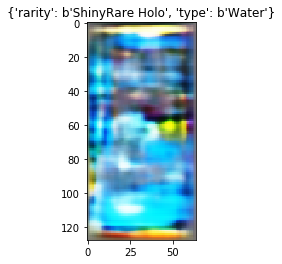

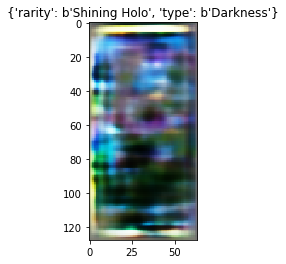

31 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 277us/sample - loss: 1.9365 - rarity_loss: 1.4235 - type_loss: 0.5130 - rarity_categorical_accuracy: 0.4645 - type_categorical_accuracy: 0.8435
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.2990 - discriminator_loss: 5.6904 - discriminator_1_loss: 4.6086 - discriminator_categorical_accuracy: 0.0365 - discriminator_1_categorical_accuracy: 0.0775


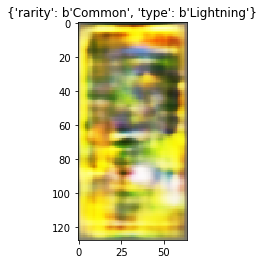

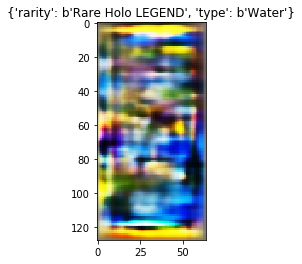

32 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 279us/sample - loss: 1.7660 - rarity_loss: 1.3732 - type_loss: 0.3929 - rarity_categorical_accuracy: 0.4695 - type_categorical_accuracy: 0.8742
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.9044 - discriminator_loss: 5.8586 - discriminator_1_loss: 5.0458 - discriminator_categorical_accuracy: 0.0235 - discriminator_1_categorical_accuracy: 0.0390


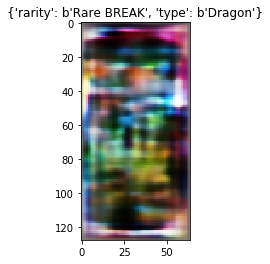

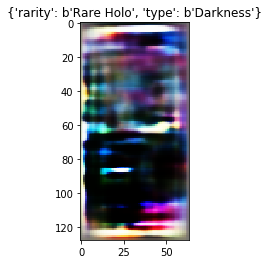

33 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 280us/sample - loss: 1.8333 - rarity_loss: 1.3932 - type_loss: 0.4400 - rarity_categorical_accuracy: 0.4735 - type_categorical_accuracy: 0.8582
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.6018 - discriminator_loss: 5.7681 - discriminator_1_loss: 4.8337 - discriminator_categorical_accuracy: 0.0365 - discriminator_1_categorical_accuracy: 0.0825


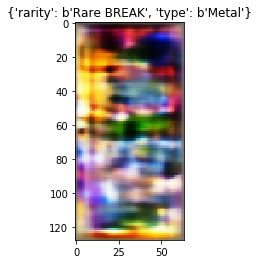

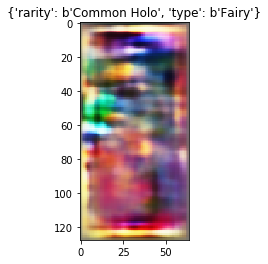

34 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 282us/sample - loss: 1.8102 - rarity_loss: 1.4082 - type_loss: 0.4020 - rarity_categorical_accuracy: 0.4735 - type_categorical_accuracy: 0.8707
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.7134 - discriminator_loss: 5.7433 - discriminator_1_loss: 4.9701 - discriminator_categorical_accuracy: 0.0205 - discriminator_1_categorical_accuracy: 0.0600


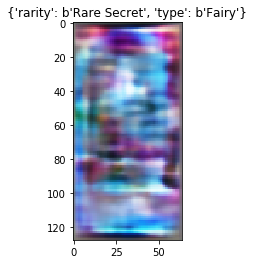

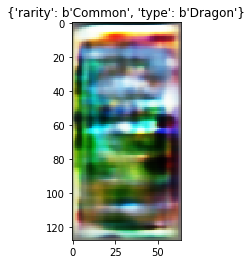

35 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 278us/sample - loss: 1.7908 - rarity_loss: 1.4026 - type_loss: 0.3882 - rarity_categorical_accuracy: 0.4643 - type_categorical_accuracy: 0.8763
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.1295 - discriminator_loss: 5.5917 - discriminator_1_loss: 4.5378 - discriminator_categorical_accuracy: 0.0315 - discriminator_1_categorical_accuracy: 0.0970


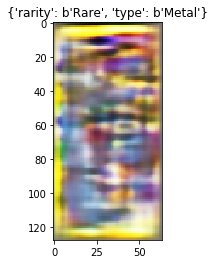

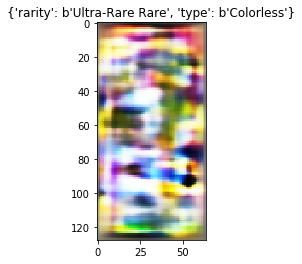

36 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 279us/sample - loss: 1.8261 - rarity_loss: 1.4052 - type_loss: 0.4208 - rarity_categorical_accuracy: 0.4712 - type_categorical_accuracy: 0.8650
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 11.4984 - discriminator_loss: 5.8752 - discriminator_1_loss: 5.6232 - discriminator_categorical_accuracy: 0.0190 - discriminator_1_categorical_accuracy: 0.0170


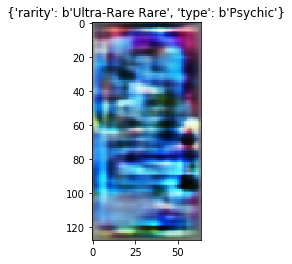

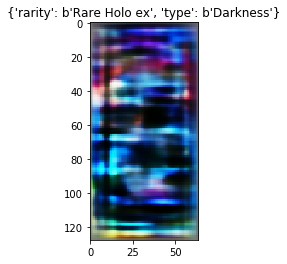

37 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 279us/sample - loss: 1.8218 - rarity_loss: 1.3710 - type_loss: 0.4507 - rarity_categorical_accuracy: 0.4767 - type_categorical_accuracy: 0.8628
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 9.8719 - discriminator_loss: 5.5555 - discriminator_1_loss: 4.3164 - discriminator_categorical_accuracy: 0.0430 - discriminator_1_categorical_accuracy: 0.1290


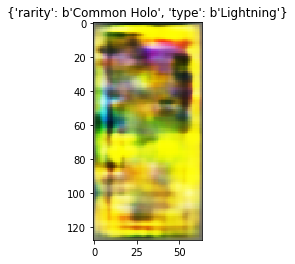

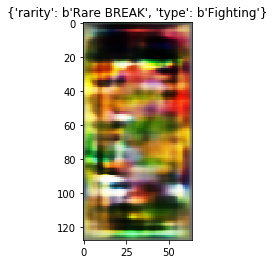

38 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 278us/sample - loss: 1.7226 - rarity_loss: 1.3387 - type_loss: 0.3839 - rarity_categorical_accuracy: 0.4988 - type_categorical_accuracy: 0.8748
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 11.0403 - discriminator_loss: 5.9542 - discriminator_1_loss: 5.0860 - discriminator_categorical_accuracy: 0.0255 - discriminator_1_categorical_accuracy: 0.0435


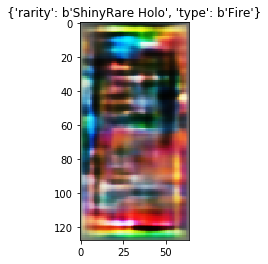

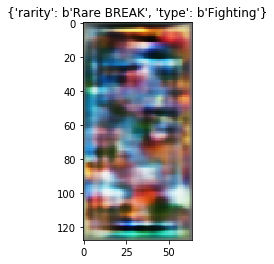

39 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 279us/sample - loss: 1.8317 - rarity_loss: 1.3930 - type_loss: 0.4387 - rarity_categorical_accuracy: 0.4760 - type_categorical_accuracy: 0.8598
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.6199 - discriminator_loss: 5.7771 - discriminator_1_loss: 4.8429 - discriminator_categorical_accuracy: 0.0265 - discriminator_1_categorical_accuracy: 0.0820


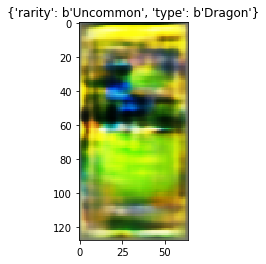

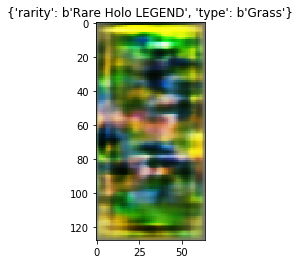

40 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 277us/sample - loss: 1.7403 - rarity_loss: 1.3452 - type_loss: 0.3951 - rarity_categorical_accuracy: 0.4940 - type_categorical_accuracy: 0.8738
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 11.0181 - discriminator_loss: 5.9682 - discriminator_1_loss: 5.0498 - discriminator_categorical_accuracy: 0.0240 - discriminator_1_categorical_accuracy: 0.0575


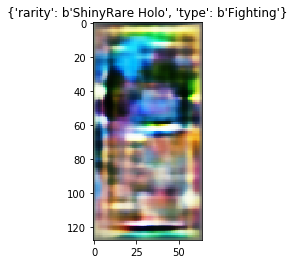

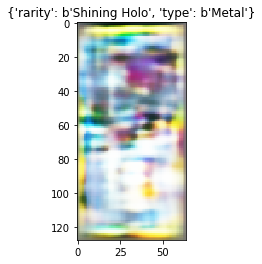

41 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 278us/sample - loss: 1.7608 - rarity_loss: 1.3726 - type_loss: 0.3882 - rarity_categorical_accuracy: 0.4765 - type_categorical_accuracy: 0.8753
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.7426 - discriminator_loss: 5.8151 - discriminator_1_loss: 4.9275 - discriminator_categorical_accuracy: 0.0345 - discriminator_1_categorical_accuracy: 0.0830


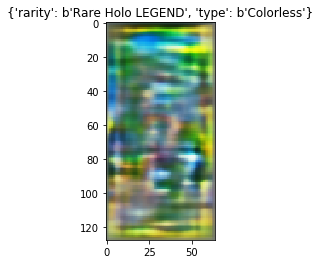

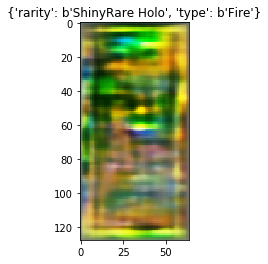

42 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 278us/sample - loss: 1.8271 - rarity_loss: 1.3737 - type_loss: 0.4534 - rarity_categorical_accuracy: 0.4853 - type_categorical_accuracy: 0.8573
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.8968 - discriminator_loss: 5.9260 - discriminator_1_loss: 4.9707 - discriminator_categorical_accuracy: 0.0195 - discriminator_1_categorical_accuracy: 0.0610


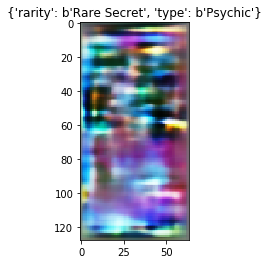

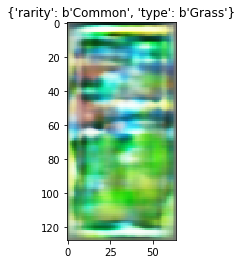

43 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 280us/sample - loss: 1.8367 - rarity_loss: 1.3824 - type_loss: 0.4544 - rarity_categorical_accuracy: 0.4798 - type_categorical_accuracy: 0.8503
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.9456 - discriminator_loss: 5.6732 - discriminator_1_loss: 5.2724 - discriminator_categorical_accuracy: 0.0265 - discriminator_1_categorical_accuracy: 0.0500


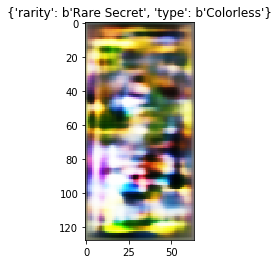

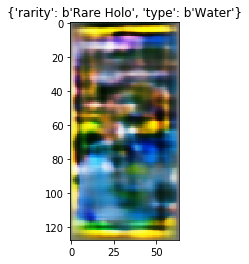

44 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 278us/sample - loss: 1.7767 - rarity_loss: 1.3610 - type_loss: 0.4157 - rarity_categorical_accuracy: 0.5015 - type_categorical_accuracy: 0.8623
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.4753 - discriminator_loss: 5.6511 - discriminator_1_loss: 4.8242 - discriminator_categorical_accuracy: 0.0410 - discriminator_1_categorical_accuracy: 0.0780


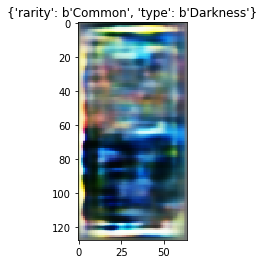

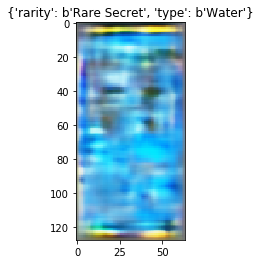

45 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 278us/sample - loss: 1.7432 - rarity_loss: 1.3689 - type_loss: 0.3743 - rarity_categorical_accuracy: 0.4900 - type_categorical_accuracy: 0.8788
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.6649 - discriminator_loss: 5.8352 - discriminator_1_loss: 4.8297 - discriminator_categorical_accuracy: 0.0395 - discriminator_1_categorical_accuracy: 0.0570


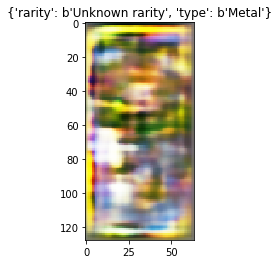

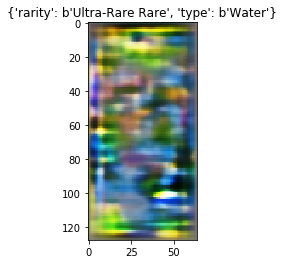

46 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 276us/sample - loss: 1.7892 - rarity_loss: 1.3504 - type_loss: 0.4388 - rarity_categorical_accuracy: 0.4922 - type_categorical_accuracy: 0.8533
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 11.6728 - discriminator_loss: 6.1003 - discriminator_1_loss: 5.5724 - discriminator_categorical_accuracy: 0.0200 - discriminator_1_categorical_accuracy: 0.0175


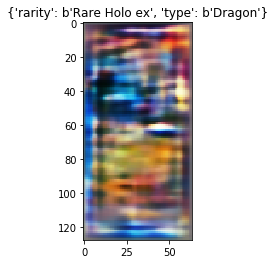

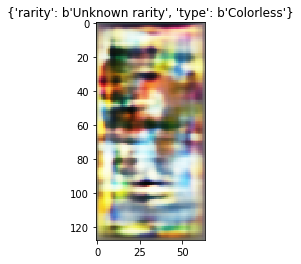

47 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 280us/sample - loss: 1.8058 - rarity_loss: 1.3537 - type_loss: 0.4521 - rarity_categorical_accuracy: 0.4905 - type_categorical_accuracy: 0.8587
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.6192 - discriminator_loss: 5.9104 - discriminator_1_loss: 4.7088 - discriminator_categorical_accuracy: 0.0425 - discriminator_1_categorical_accuracy: 0.0725


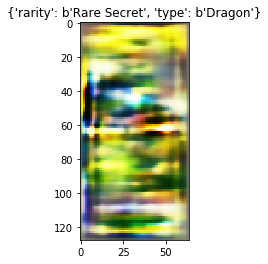

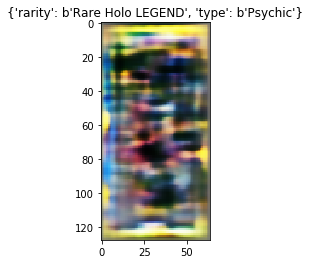

48 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 278us/sample - loss: 1.7265 - rarity_loss: 1.3524 - type_loss: 0.3741 - rarity_categorical_accuracy: 0.4858 - type_categorical_accuracy: 0.8795
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 11.1595 - discriminator_loss: 5.9943 - discriminator_1_loss: 5.1652 - discriminator_categorical_accuracy: 0.0245 - discriminator_1_categorical_accuracy: 0.0560


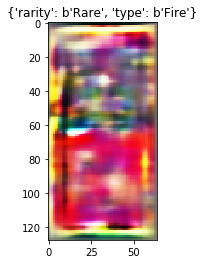

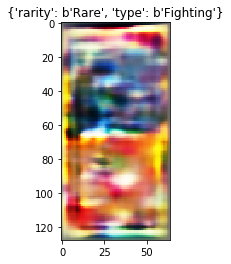

49 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 278us/sample - loss: 1.7640 - rarity_loss: 1.3704 - type_loss: 0.3936 - rarity_categorical_accuracy: 0.4887 - type_categorical_accuracy: 0.8722
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.7268 - discriminator_loss: 5.8709 - discriminator_1_loss: 4.8559 - discriminator_categorical_accuracy: 0.0365 - discriminator_1_categorical_accuracy: 0.0690


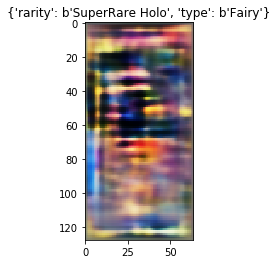

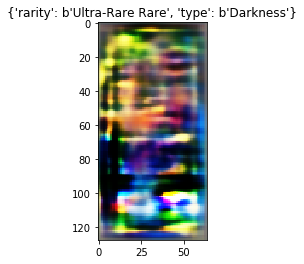

50 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 279us/sample - loss: 1.7401 - rarity_loss: 1.3274 - type_loss: 0.4127 - rarity_categorical_accuracy: 0.5113 - type_categorical_accuracy: 0.8665
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 11.3160 - discriminator_loss: 6.0589 - discriminator_1_loss: 5.2570 - discriminator_categorical_accuracy: 0.0210 - discriminator_1_categorical_accuracy: 0.0385


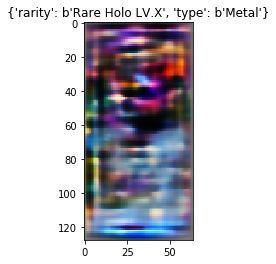

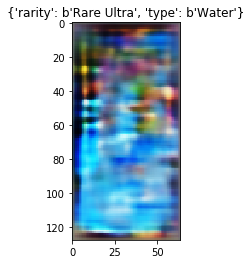

51 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 278us/sample - loss: 1.8239 - rarity_loss: 1.3766 - type_loss: 0.4474 - rarity_categorical_accuracy: 0.4908 - type_categorical_accuracy: 0.8618
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.9540 - discriminator_loss: 5.8375 - discriminator_1_loss: 5.1165 - discriminator_categorical_accuracy: 0.0450 - discriminator_1_categorical_accuracy: 0.0530


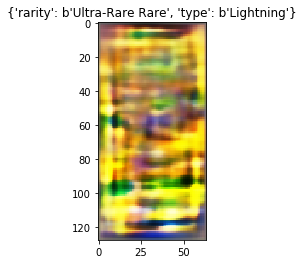

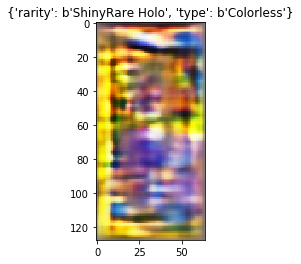

52 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 279us/sample - loss: 1.7871 - rarity_loss: 1.3328 - type_loss: 0.4543 - rarity_categorical_accuracy: 0.5042 - type_categorical_accuracy: 0.8518
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 11.5414 - discriminator_loss: 5.9649 - discriminator_1_loss: 5.5765 - discriminator_categorical_accuracy: 0.0180 - discriminator_1_categorical_accuracy: 0.0200


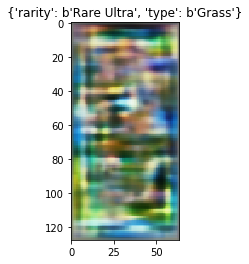

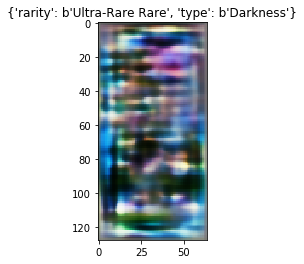

53 / 200
Train on 6000 samples
6000/6000 [==============================] - 2s 280us/sample - loss: 1.7956 - rarity_loss: 1.3583 - type_loss: 0.4373 - rarity_categorical_accuracy: 0.4947 - type_categorical_accuracy: 0.8680
Train on 2000 samples
2000/2000 [==============================] - 5s 2ms/sample - loss: 10.0024 - discriminator_loss: 5.6234 - discriminator_1_loss: 4.3789 - discriminator_categorical_accuracy: 0.0520 - discriminator_1_categorical_accuracy: 0.1350


KeyboardInterrupt: 

In [74]:
gc.collect()
try:
    for i in range(n_epochs):
        print(f"{i} / {n_epochs}")

        # discriminator
        train_discriminator(1, n_fake=n_random_inputs_per_training, n_real=n_real_per_training)
        gc.collect()
        
        # generator
        train_generator(1, n_fake=n_random_inputs_per_training)
        gc.collect()
        
        plot_images_and_classes(2)
finally:
    gc.collect()

In [36]:
gc.collect()

26019

# Test a couple of records

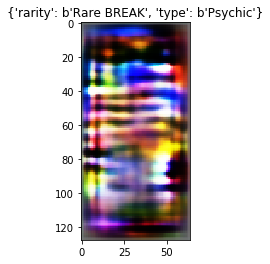

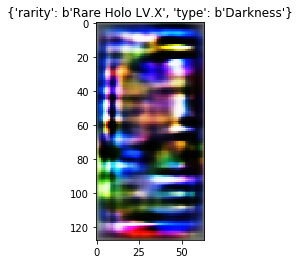

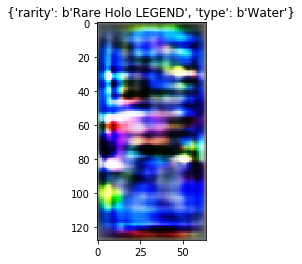

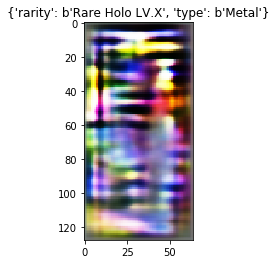

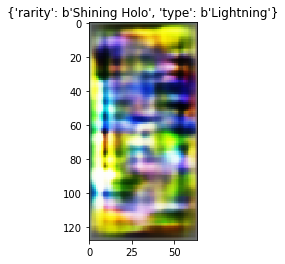

In [73]:
plot_images_and_classes(5)

In [72]:
train_generator(30, n_fake=n_random_inputs_per_training)

Train on 2000 samples
Epoch 1/30
2000/2000 [==============================] - 5s 2ms/sample - loss: 7.3225 - discriminator_loss: 4.4463 - discriminator_1_loss: 2.8762 - discriminator_categorical_accuracy: 0.1320 - discriminator_1_categorical_accuracy: 0.3770
Epoch 2/30
2000/2000 [==============================] - 5s 2ms/sample - loss: 7.4682 - discriminator_loss: 4.5078 - discriminator_1_loss: 2.9604 - discriminator_categorical_accuracy: 0.1280 - discriminator_1_categorical_accuracy: 0.3610
Epoch 3/30
2000/2000 [==============================] - 5s 2ms/sample - loss: 7.3543 - discriminator_loss: 4.4216 - discriminator_1_loss: 2.9327 - discriminator_categorical_accuracy: 0.1365 - discriminator_1_categorical_accuracy: 0.3475
Epoch 4/30
2000/2000 [==============================] - 5s 2ms/sample - loss: 7.3197 - discriminator_loss: 4.4428 - discriminator_1_loss: 2.8769 - discriminator_categorical_accuracy: 0.1560 - discriminator_1_categorical_accuracy: 0.3565
Epoch 5/30
2000/2000 [========

KeyboardInterrupt: 